# Santando Customer Satisfaction 

This Kaggle competition asks us to identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.  <br><br>
In this competition, we'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

This notebook provides a step-by-step analysis and solution to the given problem. 
It is divided into four main sections: 
- Exploratory Analysis - as a first step, we explore the main characteristics of the data with;
- Model selection  - in this section we build  some predictive model of the cuisine and choose which one have the best performances (Model performance (AUC), Computer performance (Execution time)); 
- Features selection - in this section we reduce the model complexity by decreasing the number of feature to obtain our final model. We'll conclude this part with LIME to enhance model's interpretability.
- Errors analysis - here we will see when the model make bad predictions to see some trends <br>

In [1]:

# Based on https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

from itertools import combinations
from numpy import array,array_equal

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import itertools
import time

from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection as ms
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score as auc
import sklearn.metrics as sklm

from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
import lime


np.random.seed(1)

In [2]:
from __future__ import print_function

In [276]:
#pip install lime

In [3]:
# Next, we'll load the train and test dataset
train = pd.read_csv("train.csv") # the train dataset is now a Pandas DataFrame
test = pd.read_csv("test.csv") # the train dataset is now a Pandas DataFrame

# I. Santando Customer Satisfaction - EXPLORATORY ANALYSIS

#### *First look of the training data:*

In [3]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
print ("Rows     : " ,train.shape[0])
print ("Columns  : " ,train.shape[1])
print ("\nFeatures : \n" ,train.columns.tolist())
print ("\nMissing values :  ", train.isnull().sum().values.sum())
print ("\nUnique values :  \n",train.nunique())

Rows     :  76020
Columns  :  371

Features : 
 ['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_v

Let's see the target variable :

In [5]:
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


Happy customers have TARGET==0, unhappy custormers have TARGET==1.
A little less then 4% are unhappy => unbalanced dataset

### Remove constant features 

We remove feature vectors containing one unique value, because such features do not have predictive value.

In [24]:
def identify_constant_features(dataframe):
    count_uniques = dataframe.apply(lambda x: len(x.unique()))
    constants = count_uniques[count_uniques == 1].index.tolist()
    return constants

constant_features_train = set(identify_constant_features(train))

print('There were {} constant features in TRAIN dataset.'.format(
        len(constant_features_train)))

There were 34 constant features in TRAIN dataset.


In [25]:
# Drop the constant features
train.drop(constant_features_train, inplace=True, axis=1)

In [ ]:
#autre méthodes
"""
def remove_feat_constants(data_frame):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    print("")
    print("Deleting zero variance features...")
    # Let's get the zero variance features by fitting VarianceThreshold
    # selector to the data, but let's not transform the data with
    # the selector because it will also transform our Pandas data frame into
    # NumPy array and we would like to keep the Pandas data frame. Therefore,
    # let's delete the zero variance features manually.
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold()
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    # Print info
    n_features_deleted = feat_ix_delete.size
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame
"""

### Remove identicals features

We find feature vectors having the same values in the same order and remove all but one of those redundant features.

In [26]:
def remove_feat_identicals(data_frame):
    # Find feature vectors having the same values in the same order and
    # remove all but one of those redundant features.
    print("")
    print("Deleting identical features...")
    n_features_originally = data_frame.shape[1]
    # Find the names of identical features by going through all the
    # combinations of features (each pair is compared only once).
    feat_names_delete = []
    for feat_1, feat_2 in itertools.combinations(
            iterable=data_frame.columns, r=2):
        if np.array_equal(data_frame[feat_1], data_frame[feat_2]):
            feat_names_delete.append(feat_2)
    feat_names_delete = np.unique(feat_names_delete)
    # Delete the identical features
    data_frame = data_frame.drop(labels=feat_names_delete, axis=1)
    n_features_deleted = len(feat_names_delete)
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame

In [27]:
train = remove_feat_identicals(train)


Deleting identical features...
  - Deleted 29 / 337 features (~= 8.6 %)


In [28]:
train.shape

(76020, 308)

After removing constant columns and duplicate columns, our training set have 308 variables (befode, he had 370 variables, this process deleted 62 variables).

### Apply PCA

In [27]:
def principal_component_analysis(x_train):

    """
    Principal Component Analysis (PCA) identifies the combination
    of attributes (principal components, or directions in the feature space)
    that account for the most variance in the data.

    Let's calculate the 2 first principal components of the training data,
    and then create a scatter plot visualizing the training data examples
    projected on the calculated components.
    """

    # Extract the variable to be predicted
    y_train = x_train["TARGET"]
    x_train = x_train.drop(labels="TARGET", axis=1)
    classes = np.sort(np.unique(y_train))
    labels = ["Satisfied customer", "Unsatisfied customer"]

    # Normalize each feature to unit norm (vector length)
    x_train_normalized = normalize(x_train, axis=0)
    
    # Run PCA
    pca = PCA(n_components=2)
    x_train_projected = pca.fit_transform(x_train_normalized)

    # Visualize
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    colors = [(0.0, 0.63, 0.69), 'black']
    markers = ["o", "D"]
    for class_ix, marker, color, label in zip(
            classes, markers, colors, labels):
        ax.scatter(x_train_projected[np.where(y_train == class_ix), 0],
                   x_train_projected[np.where(y_train == class_ix), 1],
                   marker=marker, color=color, edgecolor='whitesmoke',
                   linewidth='1', alpha=0.9, label=label)
        ax.legend(loc='best')
    plt.title(
        "Scatter plot of the training data examples projected on the "
        "2 first principal components")
    plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
    plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))
    plt.show()

    plt.savefig("pca.pdf", format='pdf')
    plt.savefig("pca.png", format='png')


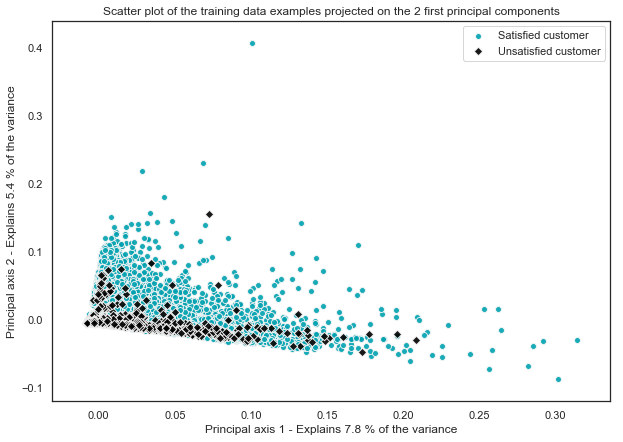

<Figure size 432x288 with 0 Axes>

In [28]:
principal_component_analysis(train)

### Let's separate the target and the feature

In [29]:
X = train.iloc[:,:-1]
y = train.TARGET

### Add feature that counts the number of zeros in a row

In [30]:
X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

In [11]:
X.n0.head()

0    292
1    266
2    277
3    248
4    256
Name: n0, dtype: int64

### Let's look at single feature performance

I want to use this step to focus my data vizualisation on the most inportants variables

**Let see single feature performance with LightGBMClassifier**

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                                       test_size=0.5, random_state=1)
verySimpleLearner = LGBMClassifier(n_estimators=30, max_features=2, max_depth=3, 
                                                  min_samples_leaf=100,learning_rate=0.1, 
                                                  subsample=0.65, loss='deviance', random_state=1)

# ne pas hesiter à mettre un classifier vraiment weak vec des hyperparemeter très bas, gain de temps et
#boosting donne un meilleur classifier final quand l'on pars de clasifier faible

startTime = time.time()
singleFeatureTable = pd.DataFrame(index=range(len(X_train.columns)), columns=['feature','AUC'])
for k,feature in enumerate(X_train.columns):
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
    singleFeatureTable.ix[k,'feature'] = feature
    singleFeatureTable.ix[k,'AUC'] = validAUC
        
print("finished evaluating single features. took %.2f minutes" %((time.time()-startTime)/60))

finished evaluating single features. took 0.33 minutes


In [18]:
#Show single feature AUC performance

singleFeatureTable = singleFeatureTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

singleFeatureTable.ix[:15,:]

,feature,AUC
0,saldo_var30,0.717512
1,var15,0.709281
2,n0,0.703696
3,saldo_var42,0.697709
4,saldo_medio_var5_hace2,0.696274
5,saldo_medio_var5_ult1,0.690055
6,num_var4,0.689516
7,num_var35,0.689109
8,saldo_medio_var5_ult3,0.686462
9,saldo_var5,0.685178


**Let see single feature performance with GradientBoostingClassifier**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                                       test_size=0.5, random_state=1)
verySimpleLearner = ensemble.GradientBoostingClassifier(n_estimators=20, max_features=1, max_depth=3, 
                                                        min_samples_leaf=100, learning_rate=0.1, 
                                                        subsample=0.65, loss='deviance', random_state=1)

startTime = time.time()
singleFeatureTable = pd.DataFrame(index=range(len(X_train.columns)), columns=['feature','AUC'])
for k,feature in enumerate(X_train.columns):
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
    singleFeatureTable.ix[k,'feature'] = feature
    singleFeatureTable.ix[k,'AUC'] = validAUC
        
print("finished evaluating single features. took %.2f minutes" %((time.time()-startTime)/60))

In [22]:
#Show single feature AUC performance

singleFeatureTable = singleFeatureTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

singleFeatureTable.ix[:15,:]

,feature,AUC
0,saldo_var30,0.71364
1,var15,0.710182
2,n0,0.70334
3,saldo_medio_var5_hace2,0.695591
4,saldo_var42,0.695248
5,num_var4,0.689323
6,num_var35,0.689004
7,saldo_medio_var5_ult1,0.686778
8,saldo_medio_var5_ult3,0.68618
9,saldo_var5,0.68534


In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                                       test_size=0.5, random_state=1)
verySimpleLearner = ensemble.AdaBoostClassifier()

startTime = time.time()
singleFeatureTable = pd.DataFrame(index=range(len(X_train.columns)), columns=['feature','AUC'])
for k,feature in enumerate(X_train.columns):
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
    singleFeatureTable.ix[k,'feature'] = feature
    singleFeatureTable.ix[k,'AUC'] = validAUC
        
print("finished evaluating single features. took %.2f minutes" %((time.time()-startTime)/60))

finished evaluating single features. took 2.85 minutes


In [27]:
#Show single feature AUC performance

singleFeatureTable = singleFeatureTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

singleFeatureTable.ix[:15,:]

,feature,AUC
0,saldo_var30,0.711911
1,var15,0.706774
2,n0,0.703305
3,saldo_var42,0.696115
4,saldo_medio_var5_hace2,0.695049
5,num_var4,0.689516
6,num_var35,0.689173
7,saldo_medio_var5_ult1,0.686975
8,saldo_var5,0.684664
9,saldo_medio_var5_ult3,0.684209


### Let's look how good some feature perform with each other
Generate 400 five-wise random feature combinations and calculate their AUC

In [37]:
#%% find interesting fivewise combinations

numFeaturesInCombination = 5
numCombinations = 400
numBestSingleFeaturesToSelectFrom = 20

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                                       test_size=0.5, random_state=1)
weakLearner = ensemble.GradientBoostingClassifier(n_estimators=30, max_features=2, max_depth=3, 
                                                  min_samples_leaf=100,learning_rate=0.1, 
                                                  subsample=0.65, loss='deviance', random_state=1)

featuresToUse = singleFeatureTable.ix[0:numBestSingleFeaturesToSelectFrom-1,'feature']
featureColumnNames = ['feature'+str(x+1) for x in range(numFeaturesInCombination)]
featureCombinationsTable = pd.DataFrame(index=range(numCombinations), columns=featureColumnNames + ['combinedAUC'])

# for numCombinations iterations 
startTime = time.time()
for combination in range(numCombinations):
    # generate random feature combination
    randomSelectionOfFeatures = sorted(np.random.choice(len(featuresToUse), numFeaturesInCombination, replace=False))

    # store the feature names
    combinationFeatureNames = [featuresToUse[x] for x in randomSelectionOfFeatures]
    for i in range(len(randomSelectionOfFeatures)):
        featureCombinationsTable.ix[combination,featureColumnNames[i]] = combinationFeatureNames[i]

    # build features matrix to get the combination AUC
    trainInputFeatures = X_train.ix[:,combinationFeatureNames]
    validInputFeatures = X_valid.ix[:,combinationFeatureNames]
    # train learner
    weakLearner.fit(trainInputFeatures, y_train)
    # store AUC results
    validAUC = auc(y_valid, weakLearner.predict_proba(validInputFeatures)[:,1])        
    featureCombinationsTable.ix[combination,'combinedAUC'] = validAUC

validAUC = np.array(featureCombinationsTable.ix[:,'combinedAUC'])
print("(min,max) AUC = (%.4f,%.4f). took %.1f minutes" % (validAUC.min(),validAUC.max(), (time.time()-startTime)/60))


(min,max) AUC = (0.6934,0.8291). took 2.7 minutes


In [38]:
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,combinedAUC
0,saldo_var30,var15,n0,num_var4,var38,0.82908
1,saldo_var30,var15,num_var5,var36,var38,0.826978
2,saldo_var30,var15,num_var4,var36,var38,0.826834
3,saldo_var30,var15,saldo_var42,num_var5,var38,0.824144
4,saldo_var30,var15,ind_var30,num_var42,var38,0.82407
5,saldo_var30,var15,n0,num_var35,num_var42,0.821074
6,saldo_var30,var15,num_var4,num_var5,var36,0.819574
7,saldo_var30,var15,n0,num_var35,ind_var30,0.819199
8,saldo_var30,var15,n0,num_var35,ind_var30,0.819199
9,saldo_var30,var15,saldo_var42,num_var35,num_meses_var5_ult3,0.819033


In [19]:
#%% find interesting fivewise combinations

numFeaturesInCombination = 5
numCombinations = 400
numBestSingleFeaturesToSelectFrom = 20

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                                       test_size=0.5, random_state=1)
weakLearner = LGBMClassifier(n_estimators=30, max_features=2, max_depth=3, 
                                                  min_samples_leaf=100,learning_rate=0.1, 
                                                  subsample=0.65, loss='deviance', random_state=1)

# ne pas hesiter à mettre un classifier vraiment weak vec des hyperparemeter très bas, gain de temps et
#boosting donne un meilleur classifier final quand l'on pars de clasifier faible

featuresToUse = singleFeatureTable.ix[0:numBestSingleFeaturesToSelectFrom-1,'feature']
featureColumnNames = ['feature'+str(x+1) for x in range(numFeaturesInCombination)]
featureCombinationsTable = pd.DataFrame(index=range(numCombinations), columns=featureColumnNames + ['combinedAUC'])

# for numCombinations iterations 
startTime = time.time()
for combination in range(numCombinations):
    # generate random feature combination
    randomSelectionOfFeatures = sorted(np.random.choice(len(featuresToUse), numFeaturesInCombination, replace=False))

    # store the feature names
    combinationFeatureNames = [featuresToUse[x] for x in randomSelectionOfFeatures]
    for i in range(len(randomSelectionOfFeatures)):
        featureCombinationsTable.ix[combination,featureColumnNames[i]] = combinationFeatureNames[i]

    # build features matrix to get the combination AUC
    trainInputFeatures = X_train.ix[:,combinationFeatureNames]
    validInputFeatures = X_valid.ix[:,combinationFeatureNames]
    # train learner
    weakLearner.fit(trainInputFeatures, y_train)
    # store AUC results
    validAUC = auc(y_valid, weakLearner.predict_proba(validInputFeatures)[:,1])        
    featureCombinationsTable.ix[combination,'combinedAUC'] = validAUC

validAUC = np.array(featureCombinationsTable.ix[:,'combinedAUC'])
print("(min,max) AUC = (%.4f,%.4f). took %.1f minutes" % (validAUC.min(),validAUC.max(), (time.time()-startTime)/60))

(min,max) AUC = (0.6979,0.8295). took 0.8 minutes


In [20]:
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,combinedAUC
0,saldo_var30,var15,n0,saldo_medio_var5_ult1,var38,0.829509
1,saldo_var30,var15,saldo_var5,var38,num_meses_var39_vig_ult3,0.826045
2,saldo_var30,var15,num_var35,num_var30,var38,0.825861
3,saldo_var30,var15,n0,ind_var30,num_meses_var39_vig_ult3,0.822175
4,saldo_var30,var15,num_var4,saldo_medio_var5_hace3,ind_var5,0.819511
5,saldo_var30,var15,saldo_medio_var5_hace2,saldo_var5,num_var5,0.81921
6,saldo_var30,var15,saldo_medio_var5_hace2,saldo_var5,num_var5,0.81921
7,saldo_var30,var15,num_var30,ind_var5,var36,0.818925
8,saldo_var30,var15,ind_var30,ind_var5,var36,0.818893
9,saldo_var30,var15,num_var4,saldo_var5,num_var42,0.818803


Single feature performance and fivewise combinations allow us to see which variable come out frequently.

We can see that variables like saldo_var30, var 15, var38 n0, saldo_var42, num_var4 ect come out quite often. For some of them, they always come out We need to watch out those variables because they seems rather important. For now, we can try to explore them more in depth.

## Data Vizualisation on some features

### num_var4 : number of bank products

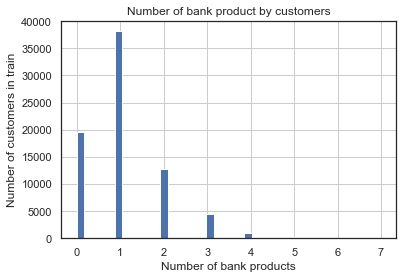

In [32]:
# According to dmi3kno (see https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223)
# num_var4 is the number of products.
# And according to our feature single performance, it's a important variable.
#Let's plot the distribution:

train.num_var4.hist(bins=40)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Number of bank product by customers')
plt.show()

Most customers have 1 product with the bank

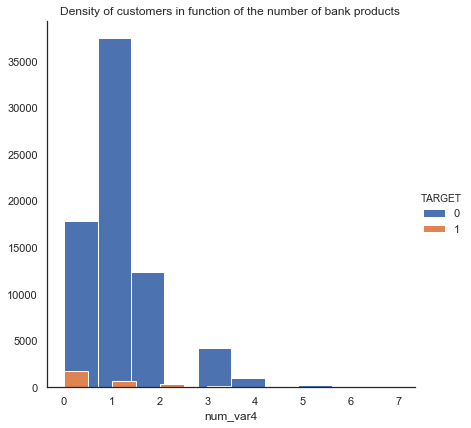

In [35]:
# Let's look at the density of the of happy/unhappy customers in function of the number of bank products
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Density of customers in function of the number of bank products ')
plt.show()

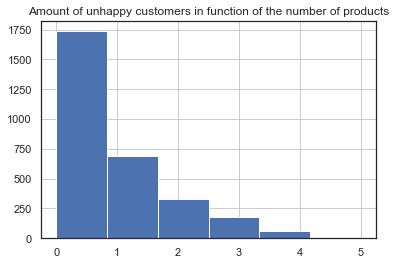

In [36]:
train[train.TARGET==1].num_var4.hist(bins=6)
plt.title('Amount of unhappy customers in function of the number of products');

Unhappy customers have less products

### Var38

var38 is important according to XGBOOST see https://www.kaggle.com/cast42/santander-customer-satisfaction/xgboost-with-early-stopping/files

Also RFC thinks var38 is important see https://www.kaggle.com/tks0123456789/santander-customer-satisfaction/data-exploration/notebook

Var38 is suspected to be the mortage value with the bank. If the mortage is with another bank the national average is used. See https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19895/var38-is-mortgage-value

dmi3kno says that var38 is value of the customer: https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223

In [37]:
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [38]:
train.var38.head()

0     39205.170000
1     49278.030000
2     67333.770000
3     64007.970000
4    117310.979016
Name: var38, dtype: float64

In [39]:
# How is var38 looking when customer is unhappy ?
train.loc[train['TARGET'] == 1, 'var38'].describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

In [40]:
# How is var38 looking when customer is happy ?
train.loc[train['TARGET'] == 0, 'var38'].describe()

count    7.301200e+04
mean     1.179592e+05
std      1.851009e+05
min      5.163750e+03
25%      6.843274e+04
50%      1.072078e+05
75%      1.197423e+05
max      2.203474e+07
Name: var38, dtype: float64

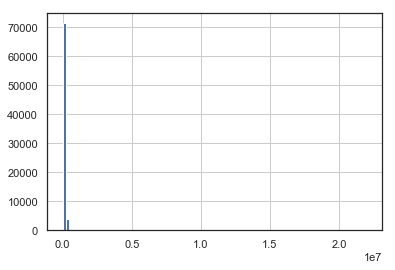

In [49]:
train.var38.hist(bins = 100)

It's not normal distributed, let's try to log var 38

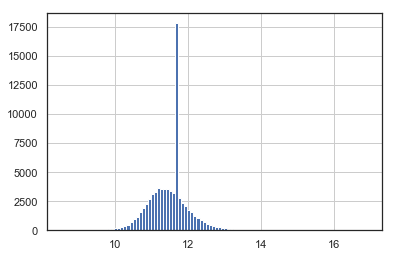

In [14]:
train.var38.map(np.log).hist(bins = 100)

Here we go but there is a spike between 11 and 12, let's try to explore this more in depth

In [15]:
train.var38.map(np.log).mode() # let's see the most common value in log(var38) to identify the spike

0    11.672584
dtype: float64

In [16]:
train.var38.value_counts().head() # Let's see the most common values for var38 

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
Name: var38, dtype: int64

The value 117310.979016 appears 14868 times in colum var38

In [37]:
train.var38[train['var38'] != 117310.979016494].mean()

117217.5333084768

The most common value is very close to the mean of the other values

Let's try to exclude this value to see th effect on the histogram of var38

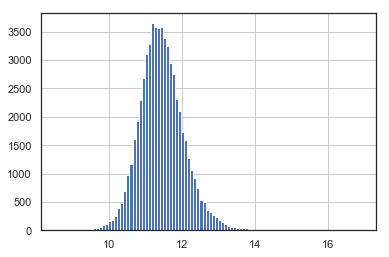

In [38]:
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins = 100)

Here we go, this would suggest we should split var38 into two variables :

- var38mc == 1 when var38 has the most common value and 0 otherwise

- logvar38 is log transformed feature when var38mc is 0, zero otherwise

In [62]:
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

In [63]:
#Check for nan's
print('Number of nan in var38mc', train['var38mc'].isnull().sum())
print('Number of nan in logvar38',train['logvar38'].isnull().sum())

Number of nan in var38mc 0
Number of nan in logvar38 0


### var15

The most important feature for XGBoost is var15. According to a Kaggle form post var15 is the age of the customer.
Our single feature performance seems to tell us the same.
Let's explore var15

In [77]:
train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

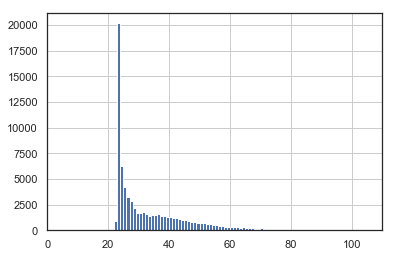

In [78]:
train.var15.hist(bins=100)

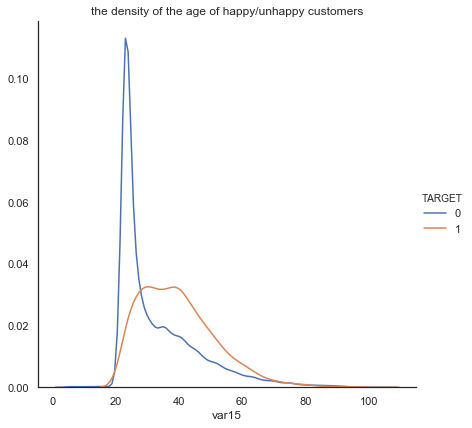

In [79]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('the density of the age of happy/unhappy customers');

Unhappy customers are slightly older

### saldo_var_30

Our feature single performance tell us that saldo_var_30 is our most important feature so let's explore her more in depth

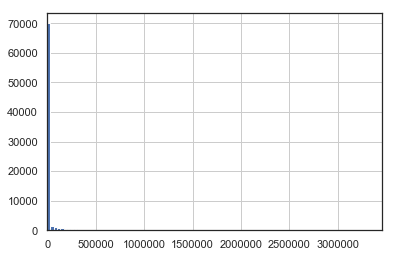

In [81]:
train.saldo_var30.hist(bins=100)
plt.xlim(0, train.saldo_var30.max());

In [64]:
# improve the plot by making the x axis logarithmic
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

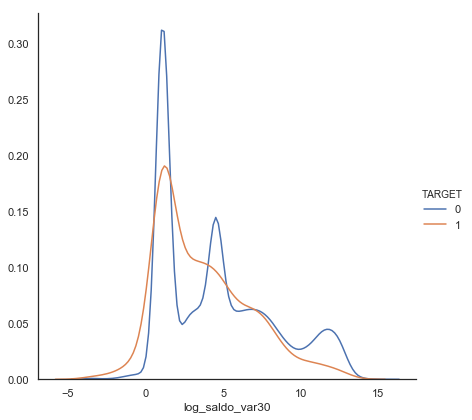

In [42]:
# Let's look at the density of the age of happy/unhappy customers for saldo_var30
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "log_saldo_var30") \
   .add_legend();

### var36

In [42]:
X['var36'].value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

var36 is most of the times 99 or 3 or 1.

C:\Users\Evan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


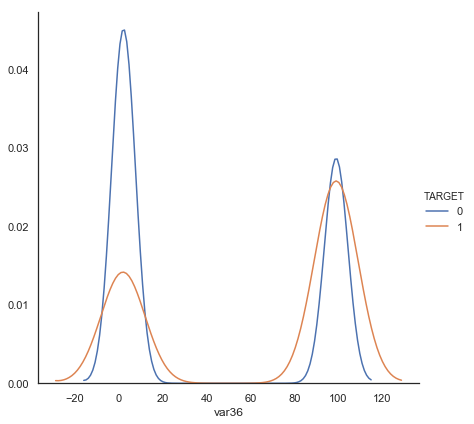

In [43]:
# Let's plot the density in function of the target variabele
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var36") \
   .add_legend()
plt.title('');

We can see that the density of unhappy customer is less important when var 36 is not 99. Interesting.

In [45]:
print(train.num_var5.value_counts())
print(train[train.TARGET==1].num_var5.value_counts())
print(train[train.TARGET==0].num_var5.value_counts())

3     50265
0     25561
6       190
9         3
15        1
Name: num_var5, dtype: int64
0    1959
3    1042
6       7
Name: num_var5, dtype: int64
3     49223
0     23602
6       183
9         3
15        1
Name: num_var5, dtype: int64


C:\Users\Evan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


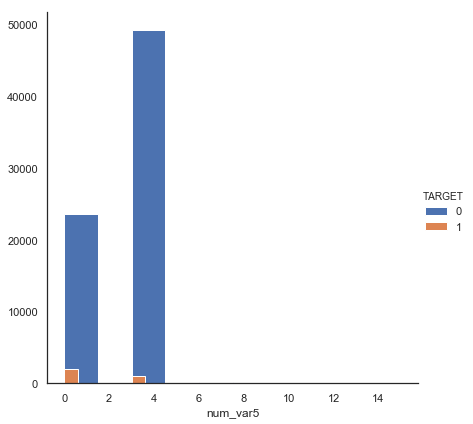

In [46]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var5") \
   .add_legend();

C:\Users\Evan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


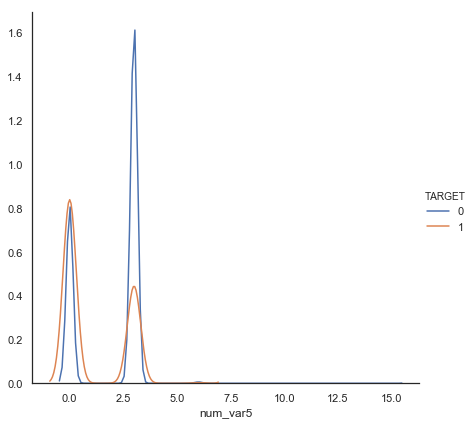

In [47]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "num_var5") \
   .add_legend();

We can clearly see that when num_var5 = 0 or 3, the customer is much more unhappy.

### var3: nationality of the customer

In [65]:
# Top-10 most common values
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [66]:

# 116 values in column var3 are -999999
# var3 is suspected to be the nationality of the customer
# -999999 would mean that the nationality of the customer is unknown
train.loc[train.var3==-999999].shape

(116, 311)

In [67]:
# Replace -999999 in var3 column with most common value 2 
# See https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999
# for details
train = train.replace(-999999,2)
train.loc[train.var3==-999999].shape

(0, 311)

## Correlations with our 308 variables

In [43]:
cor_mat = X.corr()

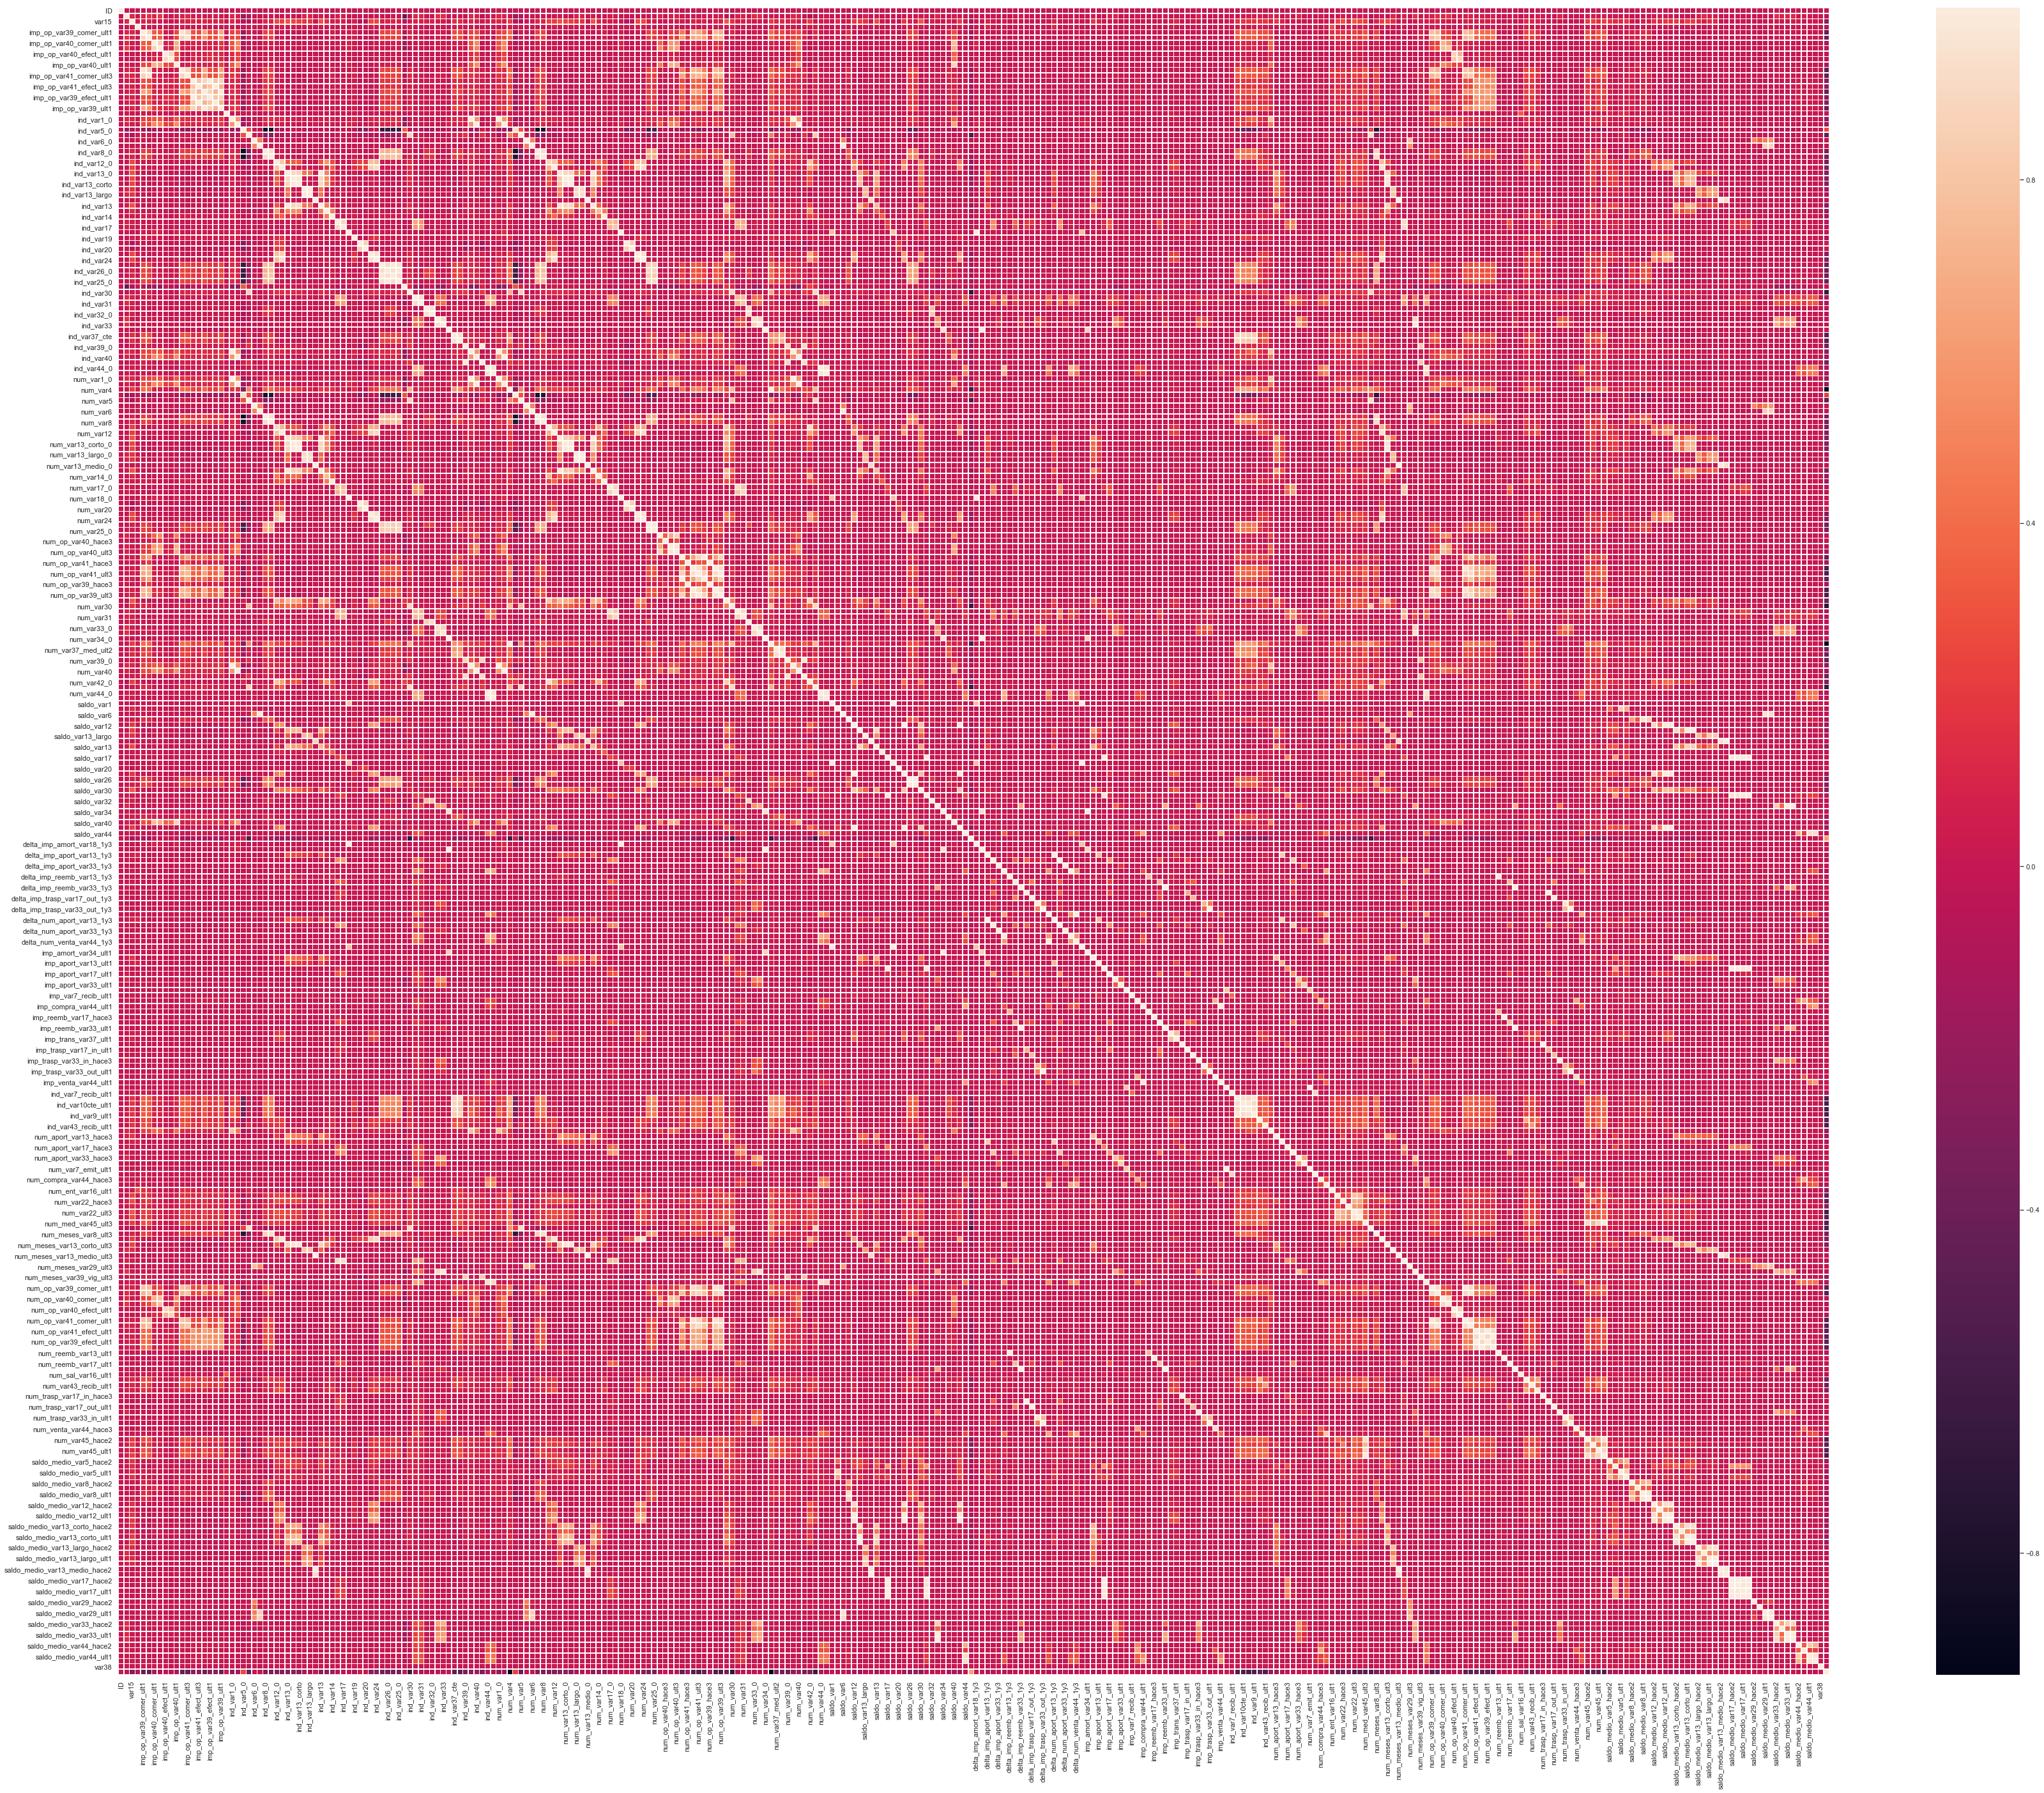

In [46]:
f, ax = plt.subplots(figsize=(60, 48))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

In [51]:
# only important correlations and not auto-correlations
threshold = 0.99
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
30,"(ind_var6, num_var6)",1.000000
4,"(delta_imp_trasp_var33_out_1y3, num_trasp_var3...",1.000000
7,"(delta_imp_reemb_var33_1y3, num_reemb_var33_ult1)",1.000000
46,"(ind_var20_0, num_var20_0)",1.000000
47,"(delta_imp_reemb_var13_1y3, num_reemb_var13_ult1)",1.000000
59,"(ind_var20, num_var20)",1.000000
57,"(num_meses_var13_medio_ult3, num_var13_medio_0)",1.000000
8,"(ind_var13_medio_0, num_var13_medio_0)",1.000000
60,"(delta_imp_amort_var18_1y3, num_var18_0)",1.000000
28,"(ind_var18_0, num_var18_0)",1.000000


This step allowed us to detect some correlation, just to get more information about our variable. It seems that 51 correlation are >=0.99, which is huge but for now let's not make any changes

# II. Santando Customer Satisfaction - Model Selection

For now, let's see which model have the best performance, with our 308 variable, in term of :

- Model performance (AUC)
- Computer performance (Execution time)

#### Model performance (AUC)

In [82]:
KFold = StratifiedKFold(n_splits=3, random_state=42)
scores = {}

def score_model(model):
    return cross_val_score(model, X, y, scoring='roc_auc', cv = KFold)


# time: 10s
scores['tree'] = score_model(tree.DecisionTreeClassifier()) 

# time: 9s
scores['extra_tree'] = score_model(ensemble.ExtraTreesClassifier())

# time: 7s
scores['forest'] = score_model(ensemble.RandomForestClassifier())

# time: 33s
scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier())

# time: 1min
scores['bagging'] = score_model(ensemble.BaggingClassifier())

# time: 2min30s
scores['grad_boost'] = score_model(ensemble.GradientBoostingClassifier())

# time: 49s
scores['ridge'] = score_model(linear_model.RidgeClassifier())

# time: 4s
scores['passive'] = score_model(linear_model.PassiveAggressiveClassifier())

# time: 4s
scores['sgd'] = score_model(linear_model.SGDClassifier())

# time: 3s
scores['gaussian'] = score_model(naive_bayes.GaussianNB())

# time: 4min
scores['xgboost'] = score_model(xgb.XGBClassifier())

scores['LightGBM'] = score_model(LGBMClassifier())

scores['LinearSVC'] = score_model(LinearSVC())

scores['LR'] = score_model(LogisticRegression())


C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

In [83]:
# Print the scores
model_scores = pd.DataFrame(scores).mean()
model_scores = model_scores.sort_values(ascending=False)
#model_scores.to_csv('model_scores.csv', index=False)
print('Model scores\n{}'.format(model_scores))

Model scores
ada_boost     0.826638
xgboost       0.824531
LightGBM      0.822981
ridge         0.791585
grad_boost    0.745586
forest        0.695653
extra_tree    0.681815
LinearSVC     0.643932
passive       0.605024
sgd           0.603065
LR            0.595998
bagging       0.566588
gaussian      0.514620
tree          0.513109
dtype: float64


ada_boost, xgboost and LightGBM are the model that I will keep. For now, let's just see which one have the best execution time.

#### Computer performance (Execution time)

In [19]:
KFold = StratifiedKFold(n_splits=3, random_state=42)

def score_model(model):
    return cross_validate(model, X, y, scoring='roc_auc', cv = KFold)

In [21]:
Scorexgb = score_model(xgb.XGBClassifier())

ScoreLightGBM = score_model(LGBMClassifier())

Scoreada_boost = score_model(ensemble.AdaBoostClassifier())

In [26]:
ar = np.array([[Scorexgb['fit_time'].mean(),
                ScoreLightGBM['fit_time'].mean(),
                Scoreada_boost['fit_time'].mean()
                ]])

    

df = pd.DataFrame(ar, index = ['Execution time'], columns = ['XGBoost',
                                                        'Light GBM',
                                                        'Ada boost'])

print(df)

                  XGBoost  Light GBM  Ada boost
Execution time  52.740796   4.367533   8.138607


Light GBM is the most efficient in term of execution time, I choose this model for my project

# III. Santando Customer Satisfaction -  Features selection

I tried several methods of features selection like : 
- Chi2
- f_classifier
- feature selection based on another model like Adaboost, XGboost, LightGBM (with feature importance) and fit on LightGBM with these selected features.
-  generate 400 five-wise random feature combinations and calculated their AUC

For the sake of clarity, I only show the method that provides the best result

Earlier, we have generated 400 five-wise random feature combinations and calculated their AUC, let's see how this feature selection perform. As a reminder, that's what we have found :

### With Gradient boosting classifier

In [101]:
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,combinedAUC
0,saldo_var30,var15,n0,num_var35,var38,0.829397
1,saldo_var30,var15,num_var35,ind_var30,var38,0.82588
2,saldo_var30,var15,ind_var30,var38,num_meses_var39_vig_ult3,0.825174
3,saldo_var30,var15,num_var30,num_var42,var38,0.825075
4,saldo_var30,var15,saldo_var42,ind_var30,var38,0.824437
5,saldo_var30,var15,n0,saldo_medio_var5_ult1,num_var30,0.82173
6,saldo_var30,var15,saldo_medio_var5_ult3,var36,num_meses_var39_vig_ult3,0.820312
7,saldo_var30,var15,saldo_medio_var5_ult3,saldo_var5,num_meses_var39_vig_ult3,0.819279
8,saldo_var30,var15,num_var35,saldo_var5,saldo_medio_var5_hace3,0.818771
9,saldo_var30,var15,num_var4,saldo_medio_var5_hace3,num_var30,0.818411


### With LightGBMClassifier

In [21]:
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,combinedAUC
0,saldo_var30,var15,n0,saldo_medio_var5_ult1,var38,0.829509
1,saldo_var30,var15,saldo_var5,var38,num_meses_var39_vig_ult3,0.826045
2,saldo_var30,var15,num_var35,num_var30,var38,0.825861
3,saldo_var30,var15,n0,ind_var30,num_meses_var39_vig_ult3,0.822175
4,saldo_var30,var15,num_var4,saldo_medio_var5_hace3,ind_var5,0.819511
5,saldo_var30,var15,saldo_medio_var5_hace2,saldo_var5,num_var5,0.81921
6,saldo_var30,var15,saldo_medio_var5_hace2,saldo_var5,num_var5,0.81921
7,saldo_var30,var15,num_var30,ind_var5,var36,0.818925
8,saldo_var30,var15,ind_var30,ind_var5,var36,0.818893
9,saldo_var30,var15,num_var4,saldo_var5,num_var42,0.818803


This kind of process tell us what are the most important feature interactions, with this, we can see which feature come out most often. I will keep only the 5 best features for LightGBM and see what they got :

- saldo_var30'
- 'var15'
- 'saldo_medio_var5_hace2'
- 'saldo_medio_var5_ult1'
- 'var38'


In [31]:
tokeep = train[['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38','TARGET']]

In [32]:
X = tokeep.iloc[:,:-1]
y = tokeep.TARGET

In [277]:
KFold = StratifiedKFold(n_splits=5, random_state=42)

def score_model(model):
    return cross_validate(model, X, y, scoring='roc_auc', cv = KFold)

ScoreLightGBM = score_model(LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01))

*Hyperparameter for LightGBM were established by GridSearchCV, I did, there was not much point to put this here*

In [98]:
pd.DataFrame(ScoreLightGBM).mean()

fit_time       2.572400
score_time     0.463354
test_score     0.828013
train_score    0.841888
dtype: float64

*Woah ! Nice, just with 5 variables, we obtain 0.828 ! Great !*

Let's see the correlation

In [101]:
cor_mat = tokeep.corr()

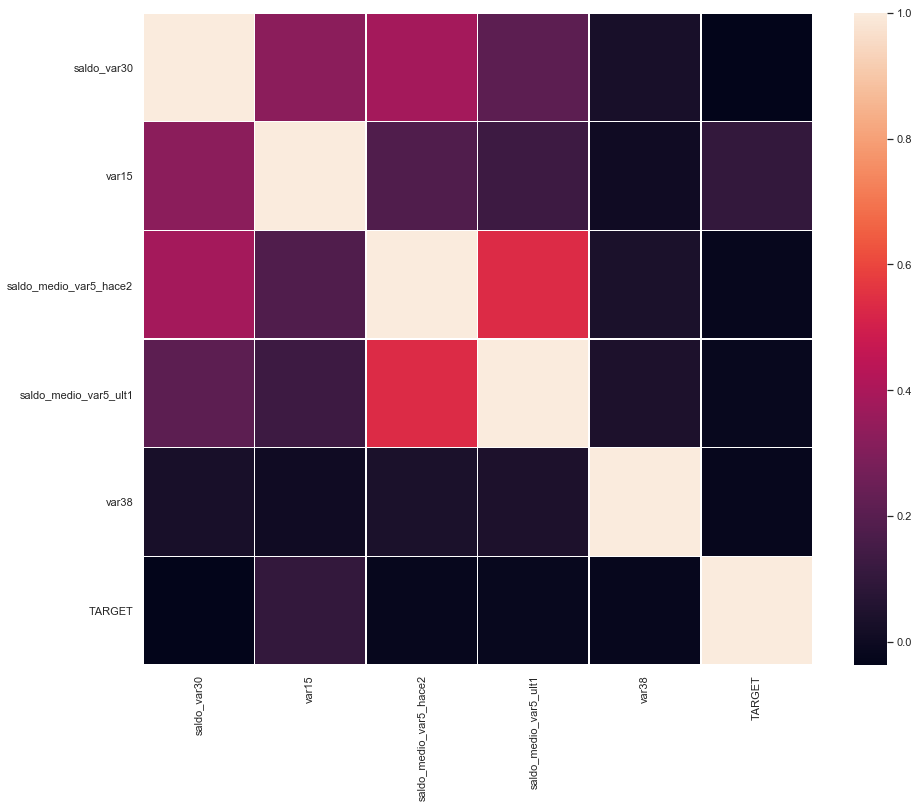

In [102]:
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax)

In [103]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

cor_mat.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,saldo_var30,var15,saldo_medio_var5_hace2,saldo_medio_var5_ult1,var38,TARGET
saldo_var30,1,0.33,0.39,0.21,0.029,-0.037
var15,0.33,1,0.18,0.13,0.0065,0.1
saldo_medio_var5_hace2,0.39,0.18,1,0.54,0.038,-0.02
saldo_medio_var5_ult1,0.21,0.13,0.54,1,0.042,-0.016
var38,0.029,0.0065,0.038,0.042,1,-0.02
TARGET,-0.037,0.1,-0.02,-0.016,-0.02,1


That's seems great, there is no major correlation

And let's see the confusion matrix

In [98]:
#Matrix confusion

from sklearn.model_selection import train_test_split

# Extractions
T2_train,T2_test,z2_train,z2_test=train_test_split(X,y,
test_size=0.3,random_state=11)
print(T2_train.shape)

(53214, 5)


In [99]:
LGBM = LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01)
clf2 =LGBM.fit(T2_train, z2_train)

probabilities = clf2.predict_proba(T2_test)
print(probabilities[:15,:])

[[0.99694974 0.00305026]
 [0.99778879 0.00221121]
 [0.96247878 0.03752122]
 [0.98714198 0.01285802]
 [0.86787566 0.13212434]
 [0.91912724 0.08087276]
 [0.99371725 0.00628275]
 [0.96397206 0.03602794]
 [0.96710291 0.03289709]
 [0.99612305 0.00387695]
 [0.97981288 0.02018712]
 [0.89494876 0.10505124]
 [0.79492196 0.20507804]
 [0.98338272 0.01661728]
 [0.96177989 0.03822011]]


In [107]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.04)

In [108]:
#Matrice de confusion

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(z2_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     16653              5273
Actual negative       232               648

Accuracy  0.76
 
           Positive      Negative
Num case    21926           880
Precision    0.99          0.11
Recall       0.76          0.74
F1           0.86          0.19


The results are nice but with such unbalanced data, I think the model will predict 0 and only 0 and still get a good score. Let's see.. 

In [100]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

In [101]:
#Matrice de confusion

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(z2_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     21926                 0
Actual negative       880                 0

Accuracy  0.96
 
           Positive      Negative
Num case    21926           880
Precision    0.96          0.00
Recall       1.00          0.00
F1           0.98          0.00


That was misleading, the model is good only because the data are unbalanced. But I want a model who will predict nicely 0 and 1 ! So I will stay with this model, but I will try some oversampling method to see if I can fix that.

### OverSampling methods

#### RandomOverSampler

In [111]:
sampler = RandomOverSampler(random_state=12, ratio = 1.0)
X_rs, y_rs = sampler.fit_sample(X, y)

In [112]:
KFold = StratifiedKFold(n_splits=5, random_state=42)

def score_model(model):
    return cross_validate(model, X_rs, y_rs, scoring='roc_auc', cv = KFold)

ScoreLightGBM = score_model(LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01))

In [113]:
pd.DataFrame(ScoreLightGBM).mean()

fit_time       4.960916
score_time     0.885591
test_score     0.838522
train_score    0.839338
dtype: float64

#### SMOTE

In [145]:
sampler = SMOTE(random_state=12, ratio = 1.0)
X_rs, y_rs = sampler.fit_sample(X, y)

In [146]:
KFold = StratifiedKFold(n_splits=5, random_state=42)

def score_model(model):
    return cross_validate(model, X_rs, y_rs, scoring='roc_auc', cv = KFold)

ScoreLightGBM = score_model(LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01))

In [147]:
pd.DataFrame(ScoreLightGBM).mean()

fit_time       1.766077
score_time     0.308000
test_score     0.914169
train_score    0.915014
dtype: float64

##### ADASYN

In [13]:
sampler = ADASYN(random_state=12, ratio = 1.0)
X_rs, y_rs = sampler.fit_sample(X, y)

In [120]:
KFold = StratifiedKFold(n_splits=5, random_state=42)

def score_model(model):
    return cross_validate(model, X_rs, y_rs, scoring='roc_auc', cv = KFold)

ScoreLightGBM = score_model(LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01))

In [121]:
pd.DataFrame(ScoreLightGBM).mean()

fit_time       4.547110
score_time     0.913732
test_score     0.910954
train_score    0.913686
dtype: float64

I choose *SMOTE*, it seems that this method have the best performance, let's see if the confusion matrix tell us the same :

In [28]:
tokeep = train[['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38','TARGET']]

X = tokeep.iloc[:,:-1]
y = tokeep.TARGET

# split data into train and test sets, using constant random state to better quantify our changes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

sampler = SMOTE(random_state=12, ratio = 1.0)
X_train_rs, y_train_rs = sampler.fit_sample(X_train, y_train)

# train model
LGBM = LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01)
LGBM.fit(X_train_rs, y_train_rs)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=750, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
probabilities = LGBM.predict_proba(X_test)
print(probabilities[:15,:])

[[0.71451647 0.28548353]
 [0.78721313 0.21278687]
 [0.7475071  0.2524929 ]
 [0.98937337 0.01062663]
 [0.9006503  0.0993497 ]
 [0.94318054 0.05681946]
 [0.87600182 0.12399818]
 [0.15703547 0.84296453]
 [0.90961195 0.09038805]
 [0.93982642 0.06017358]
 [0.90808633 0.09191367]
 [0.69755529 0.30244471]
 [0.96574054 0.03425946]
 [0.98979493 0.01020507]
 [0.97625151 0.02374849]]


In [30]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

In [31]:
#Matrice de confusion

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     19711              4411
Actual negative       323               642

Accuracy  0.81
 
           Positive      Negative
Num case    24122           965
Precision    0.98          0.13
Recall       0.82          0.67
F1           0.89          0.21


That's it, even with a threshold = 0,5, this model keeps goods prediction for y=0 AND y=1. Which was not the case before oversampling. So it's a very good point.

*Let's separate into ten parts the probabilies obtained with my final model, from the most dissastified to the least dissastified*

In [40]:
probabilities = pd.DataFrame(probabilities)
probhappy = probabilities[probabilities.columns[0]]
probunhappy = probabilities[probabilities.columns[1]]
probunhappy = pd.DataFrame(probunhappy)

In [56]:
dfunhappy = pd.concat([X_test.reset_index(drop=True),probunhappy.reset_index(drop=True)], axis=1)
dfunhappy = dfunhappy.sort_values(by=[1], ascending = False)

In [69]:
max_rows = 2510
dataframes = []
while len(dfunhappy) > max_rows:
    top = dfunhappy[:max_rows]
    dataframes.append(top)
    dfunhappy = dfunhappy[max_rows:]
else:
    dataframes.append(dfunhappy)

Then I save out these data frames in csv files for further analysis :

In [71]:
for _, frame in enumerate(dataframes):
    frame.to_csv(str(_)+'.csv', index=False)

With this kind of files, we could clearly see the parameters for our most unhappy customer for exemple if we need, so that's really useful.

## Decrypting my final Machine Learning model using LIME

Recent times have seen a renewed focus on model interpretability. Machine Learning Experts are able to understand the importance of a model interpretability in it’s subsequent adaption by business. The problem with model explainability is that it’s very hard to define a model’s decision boundary in human understandable manner, especially with boosting model. LIME is a python library which tries to solve for model interpretability by producing locally faithful explanations. Below is an example of one such explanation for my classification problem.

LIME ( Local Interpretable Model-agnostic Explanations ) is a novel explanation technique that explains the prediction of any classifier in an interpretable and faithful manner by learning a interpretable model locally around the prediction.

In [19]:
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from IPython.display import Image

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X_rs, y_rs, train_size=0.80)

class_names = ['Happy', 'Unhappy']
feature_names = ['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38']

In [15]:
LGBM = LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01)
LGBM.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=750, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,  mode='classification',  feature_names=feature_names, class_names=class_names, discretize_continuous=True)

#https://github.com/marcotcr/lime/issues/293

In [17]:
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], LGBM.predict_proba, num_features=5)

Here we'll see, for a customer being randomly selected in our database, how our model determine if this customer is happy or unhappy :

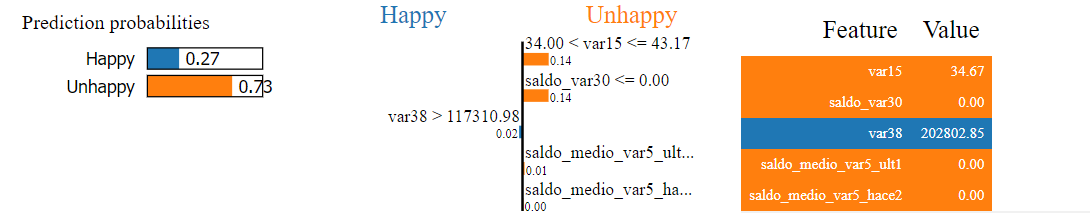

In [20]:
exp.show_in_notebook(show_table=True, show_all=False)

There are three parts to the explanation :

- Left most part gives the prediction probabilities for class Happy(0) and class Unhappy(1).
- Middle part gives the 5 most important features. As it is an example of binary class we are looking at 2 colours. Attributes having orange colour support the class 1 and those with colour blue support class 0. 34 < var15 ≤ 43.17 means when this feature’s value satisfy this criteria it support class 1. Float point number on the horizontal bars represent the relative importance of these features.
- Right most part follows the same colour coding as 1 and 2. It contains the actual values of for the top 5 variables.

In order to create trust in our model, we need to explain the model not only to Machine Learning experts but also to domain experts which require a human understandable explanation. This is achieved by creating a model agnostic locally faithful explanation set which helps even the non experts in understanding how the original model is making it’s decision. By creating a representative sample set LIME provides a global view of a model’s decision boundary to users. This model interpretability is crucial for effective human interaction with Machine Learning systems. Explaining individual predictions is important in assessing trusts and also compliments hold out set validations in model selection.

*LIME will also be used in the next step to visualise the model's errors more in depth*

# IV. Santando Customer Satisfaction - Error analysis

https://www.kaggle.com/elitcohen/forest-cover-type-eda-modeling-error-analysis

In [107]:
tokeep = train[['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38','TARGET']]

X = tokeep.iloc[:,:-1]
y = tokeep.TARGET

# split data into train and test sets, using constant random state to better quantify our changes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

sampler = SMOTE(random_state=12, ratio = 1.0)
X_train_rs, y_train_rs = sampler.fit_sample(X_train, y_train)

# train model
LGBM = LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01)
LGBM.fit(X_train_rs, y_train_rs)

# make predictions on the cross validation set
y_pred = LGBM.predict(X_test)

y_test = pd.DataFrame(y_test)
X_test = pd.DataFrame(X_test)

In [76]:
# table with data points, truth, and pred
errors = X_test.copy()
errors['truth'] = y_test
errors['pred'] = y_pred
errors = errors[errors['truth'] != errors['pred']]

In [77]:
print(errors.shape[0], 'errors over',y_pred.shape[0],'predictions')

4734 errors over 25087 predictions


In [84]:
#rename columns
errors.columns = ['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38','Truth', 'Pred']

In [85]:
errors.head()

,saldo_var30,var15,saldo_medio_var5_hace2,saldo_medio_var5_ult1,var38,Truth,Pred
14162,0.0,25,0.00,0.0,46969.410000,1,0
36671,0.0,41,0.00,0.0,59630.010000,0,1
4844,0.0,53,0.00,0.0,57136.230000,0,1
54206,30.0,62,23.25,30.0,117310.979016,0,1
27185,0.0,55,0.00,0.0,138050.850000,0,1


In [86]:
print("Number of people wrongly predict : {}".format(errors.shape[0])) 
print("\n")
print("y = 1 which had to be y=0 : {} ".format(errors.Pred.sum())) 
print("\n")
print("y = 0 which had to be y=1 : {} ".format(4734-4411)) 

Number of people wrongly predict : 4734


y = 1 which had to be y=0 : 4411 


y = 0 which had to be y=1 : 323 


In [87]:
errors.describe()

,saldo_var30,var15,saldo_medio_var5_hace2,saldo_medio_var5_ult1,var38,Truth,Pred
count,4734.000000,4734.000000,4734.000000,4734.000000,4.734000e+03,4734.000000,4734.000000
mean,425.882649,40.882974,230.282763,146.404062,1.105445e+05,0.068230,0.931770
std,7441.478620,11.289977,3682.444544,2037.198634,1.474137e+05,0.252167,0.252167
min,-1802.010000,23.000000,-5.550000,-8.370000,8.394930e+03,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,6.580516e+04,0.000000,1.000000
50%,0.000000,39.000000,0.000000,0.000000,1.022432e+05,0.000000,1.000000
75%,11.632500,47.000000,12.525000,12.577500,1.173110e+05,0.000000,1.000000
max,300060.000000,93.000000,165500.010000,84000.000000,8.658967e+06,1.000000,1.000000


*Let's analyse one customer randomly chosen more in depth with LIME*

In [91]:
analyse = errors[['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38']]

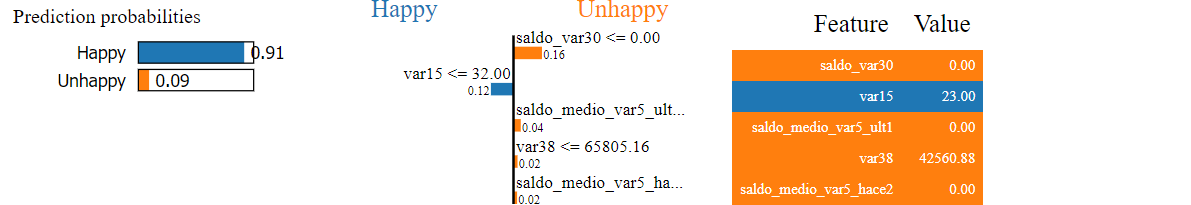

In [186]:
explainer = lime.lime_tabular.LimeTabularExplainer(analyse.values,  mode='classification',  feature_names=feature_names, class_names=class_names, discretize_continuous=True)

#https://github.com/marcotcr/lime/issues/293

i = np.random.randint(0, analyse.shape[0])
exp = explainer.explain_instance(analyse.values[i], LGBM.predict_proba, num_features=5)

exp.show_in_notebook(show_table=True, show_all=False)

As we can see, with LIME we can visualise more in depth the customer who was wrongly predict by our final model. This process could be useful to detect some patterns.

Let's also visualise with graphics :
- the happy customers my final model had correctly predicted with the wrongly predict unhappy customer who are actually happy
- the unhappy customers my final model had correctly predicted with the wrongly predict happy customer who are actually unhappy

And this, for all the variable of my final model. To see if we can determine some trend or patterns.

In [111]:
# Let's create a dataframe with only the good predictions
good = X_test.copy()
good['truth'] = y_test
good['pred'] = y_pred
good = good[good['truth'] == good['pred']]

print(good.shape[0], 'good predictions over',y_pred.shape[0],'predictions')

20353 good predictions over 25087 predictions


Let's separate the good predictions with a dataframe for y=0 only and a second one for y=1

In [114]:
good0 = good[good['pred'] == 0]

good1 = good[good['pred'] == 1]

And let's separate the wrong prediction 

In [128]:
errors1 = errors[errors['Pred'] == 1]

errors0 = errors[errors['Pred'] == 0]

#### var15

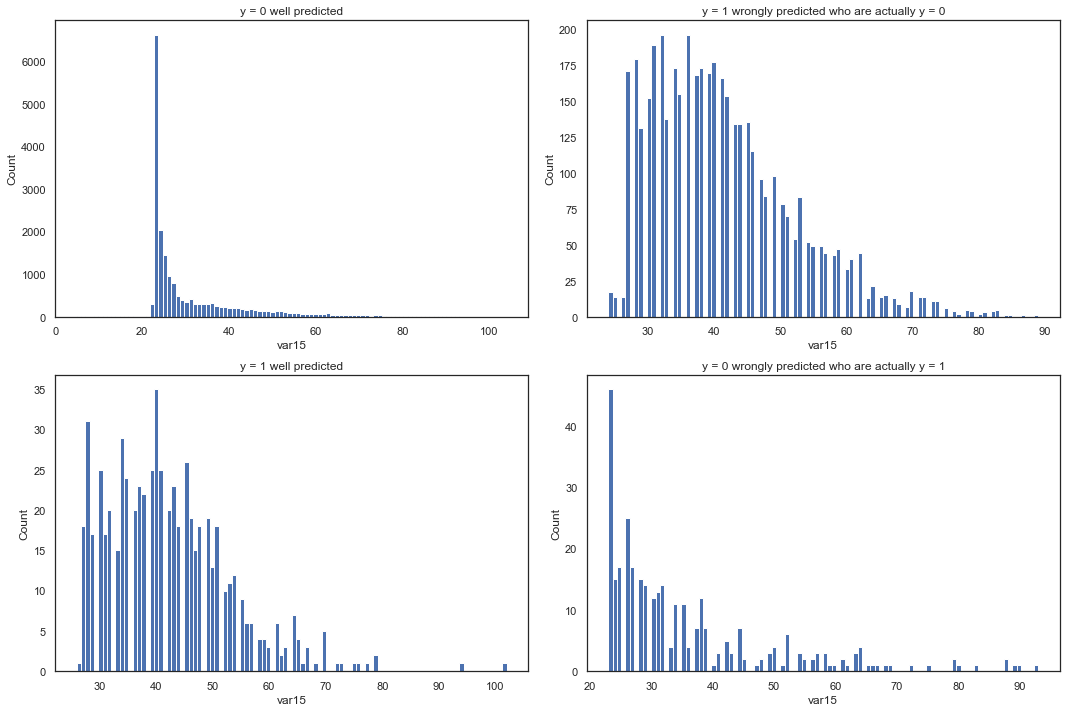

In [148]:
# Create Figure and Subplots
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax3 = plt.subplot2grid((2,2), (1,0)) 
ax4 = plt.subplot2grid((2,2), (1,1)) 


# Plot
ax1.hist(good0["var15"], bins = 100)
ax2.hist(errors1["var15"], bins = 100)
ax3.hist(good1["var15"], bins = 100)
ax4.hist(errors0["var15"], bins = 100)


# Title, X and Y labels, X and Y Lim
ax1.set_title('y = 0 well predicted'); ax2.set_title('y = 1 wrongly predicted who are actually y = 0') ; ax3.set_title('y = 1 well predicted'); ax4.set_title('y = 0 wrongly predicted who are actually y = 1')

ax1.set_xlabel('var15');  ax2.set_xlabel('var15'); ax3.set_xlabel('var15');  ax4.set_xlabel('var15')  # x label
ax1.set_ylabel('Count');  ax2.set_ylabel('Count'); ax3.set_ylabel('Count');  ax4.set_ylabel('Count')  # y label

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

#### saldo_var30

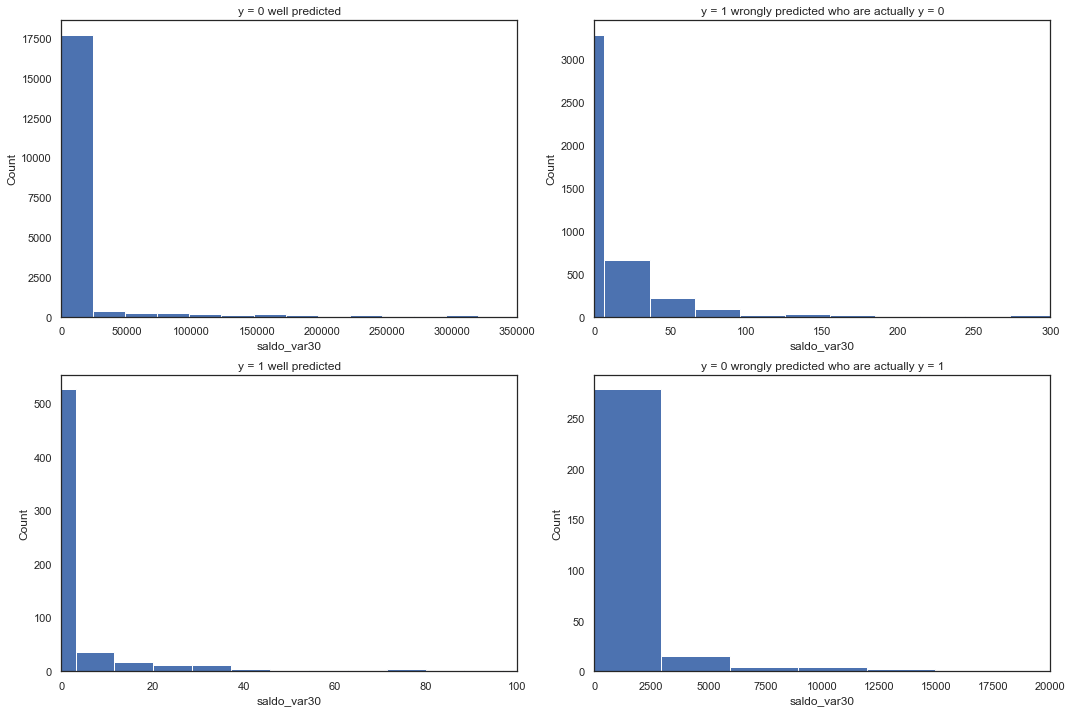

In [153]:
# Create Figure and Subplots
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax3 = plt.subplot2grid((2,2), (1,0)) 
ax4 = plt.subplot2grid((2,2), (1,1)) 


# Plot
ax1.hist(good0["saldo_var30"], bins = 100)
ax2.hist(errors1["saldo_var30"], bins = 100)
ax3.hist(good1["saldo_var30"], bins = 100)
ax4.hist(errors0["saldo_var30"], bins = 100)


# Title, X and Y labels, X and Y Lim
ax1.set_title('y = 0 well predicted'); ax2.set_title('y = 1 wrongly predicted who are actually y = 0') ; ax3.set_title('y = 1 well predicted'); ax4.set_title('y = 0 wrongly predicted who are actually y = 1')

ax1.set_xlabel('saldo_var30');  ax2.set_xlabel('saldo_var30'); ax3.set_xlabel('saldo_var30');  ax4.set_xlabel('saldo_var30')  # x label
ax1.set_ylabel('Count');  ax2.set_ylabel('Count'); ax3.set_ylabel('Count');  ax4.set_ylabel('Count')  # y label

ax1.set_xlim(0, 350000) ;  ax2.set_xlim(0, 300); ax3.set_xlim(0, 100) ;  ax4.set_xlim(0, 20000)   # x axis limits


# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [154]:
good0.head()

,saldo_var30,var15,saldo_medio_var5_hace2,saldo_medio_var5_ult1,var38,truth,pred
35732,2844.03,33,2671.98,3806.52,307194.780000,0,0
24191,0.00,25,0.00,0.00,109659.060000,0,0
10440,90.00,23,90.00,90.00,71302.530000,0,0
46585,3.00,24,3.00,3.00,117310.979016,0,0
46064,3.00,25,3.00,3.00,103667.040000,0,0


#### saldo_medio_var5_hace2

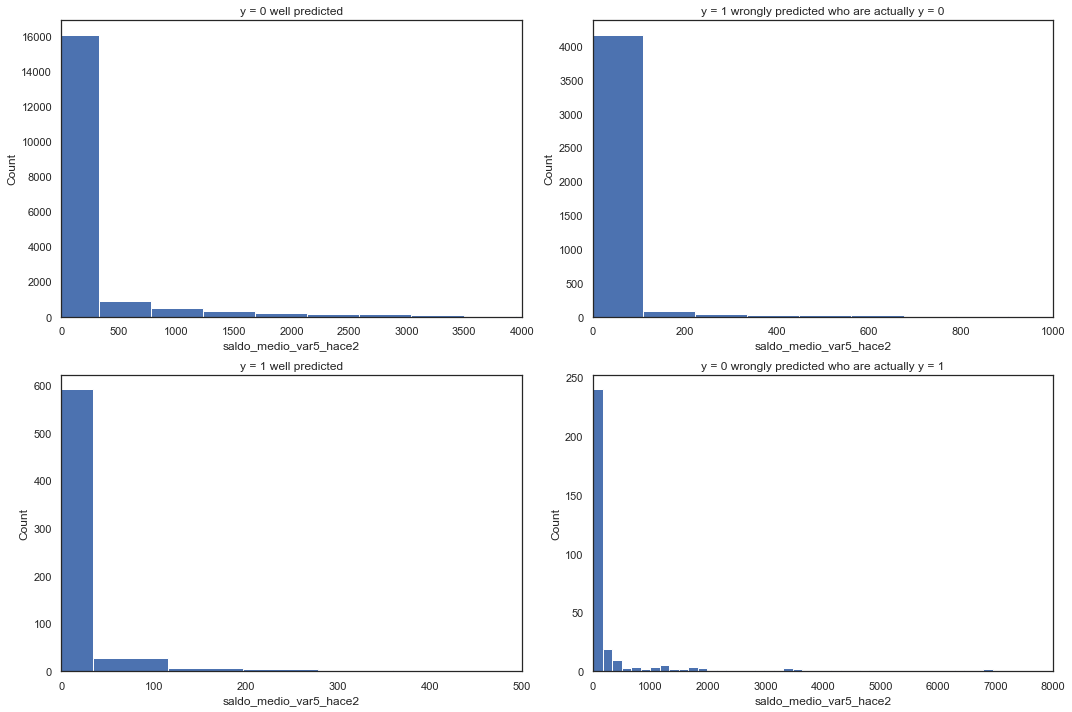

In [171]:
# Create Figure and Subplots
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax3 = plt.subplot2grid((2,2), (1,0)) 
ax4 = plt.subplot2grid((2,2), (1,1)) 


# Plot
ax1.hist(good0["saldo_medio_var5_hace2"], bins = 1000)
ax2.hist(errors1["saldo_medio_var5_hace2"], bins = 1000)
ax3.hist(good1["saldo_medio_var5_hace2"], bins = 100)
ax4.hist(errors0["saldo_medio_var5_hace2"], bins = 1000)


# Title, X and Y labels, X and Y Lim
ax1.set_title('y = 0 well predicted'); ax2.set_title('y = 1 wrongly predicted who are actually y = 0') ; ax3.set_title('y = 1 well predicted'); ax4.set_title('y = 0 wrongly predicted who are actually y = 1')

ax1.set_xlabel('saldo_medio_var5_hace2');  ax2.set_xlabel('saldo_medio_var5_hace2'); ax3.set_xlabel('saldo_medio_var5_hace2');  ax4.set_xlabel('saldo_medio_var5_hace2')  # x label
ax1.set_ylabel('Count');  ax2.set_ylabel('Count'); ax3.set_ylabel('Count');  ax4.set_ylabel('Count')  # y label

ax1.set_xlim(0, 4000) ;  ax2.set_xlim(0, 1000); ax3.set_xlim(0, 500) ;  ax4.set_xlim(0, 8000)   # x axis limits


# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

#### saldo_medio_var5_ult1

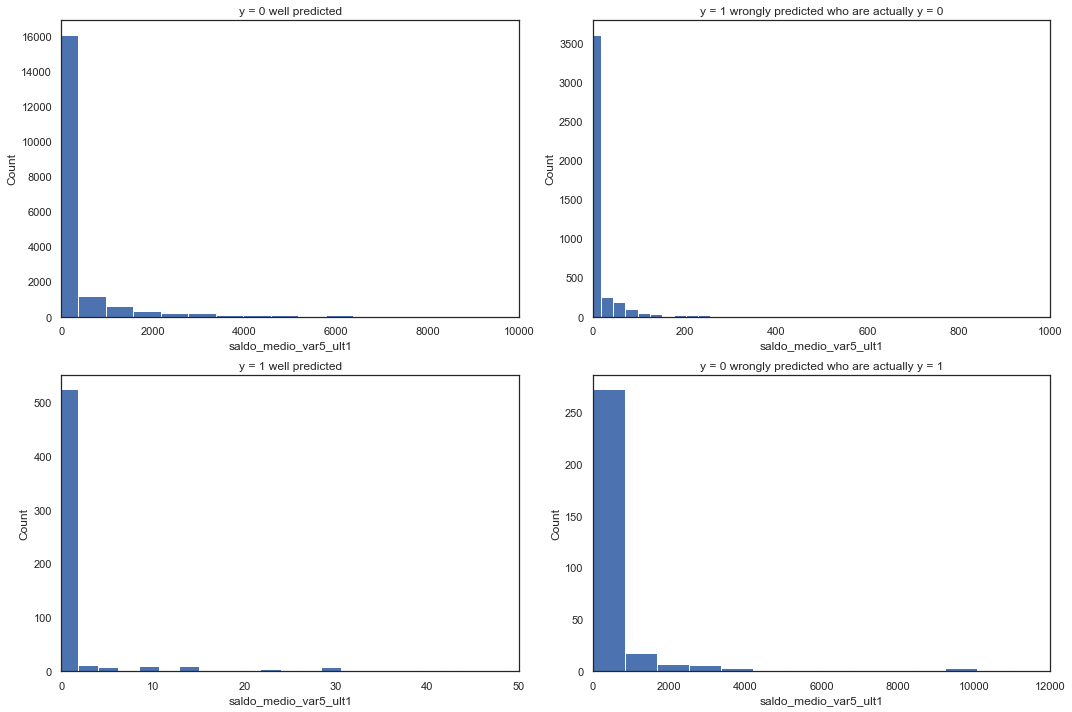

In [169]:
# Create Figure and Subplots
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax3 = plt.subplot2grid((2,2), (1,0)) 
ax4 = plt.subplot2grid((2,2), (1,1)) 


# Plot
ax1.hist(good0["saldo_medio_var5_ult1"], bins = 1000)
ax2.hist(errors1["saldo_medio_var5_ult1"], bins = 1000)
ax3.hist(good1["saldo_medio_var5_ult1"], bins = 1000)
ax4.hist(errors0["saldo_medio_var5_ult1"], bins = 100)


# Title, X and Y labels, X and Y Lim
ax1.set_title('y = 0 well predicted'); ax2.set_title('y = 1 wrongly predicted who are actually y = 0') ; ax3.set_title('y = 1 well predicted'); ax4.set_title('y = 0 wrongly predicted who are actually y = 1')

ax1.set_xlabel('saldo_medio_var5_ult1');  ax2.set_xlabel('saldo_medio_var5_ult1'); ax3.set_xlabel('saldo_medio_var5_ult1');  ax4.set_xlabel('saldo_medio_var5_ult1')  # x label
ax1.set_ylabel('Count');  ax2.set_ylabel('Count'); ax3.set_ylabel('Count');  ax4.set_ylabel('Count')  # y label

ax1.set_xlim(0, 10000) ;  ax2.set_xlim(0, 1000); ax3.set_xlim(0, 50) ;  ax4.set_xlim(0, 12000)   # x axis limits


# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [181]:
errors1.head()

,saldo_var30,var15,saldo_medio_var5_hace2,saldo_medio_var5_ult1,var38,Truth,Pred
36671,0.00,41,0.00,0.0,59630.010000,0,1
4844,0.00,53,0.00,0.0,57136.230000,0,1
54206,30.00,62,23.25,30.0,117310.979016,0,1
27185,0.00,55,0.00,0.0,138050.850000,0,1
50133,114.06,44,86.10,0.0,64037.160000,0,1


#### var38

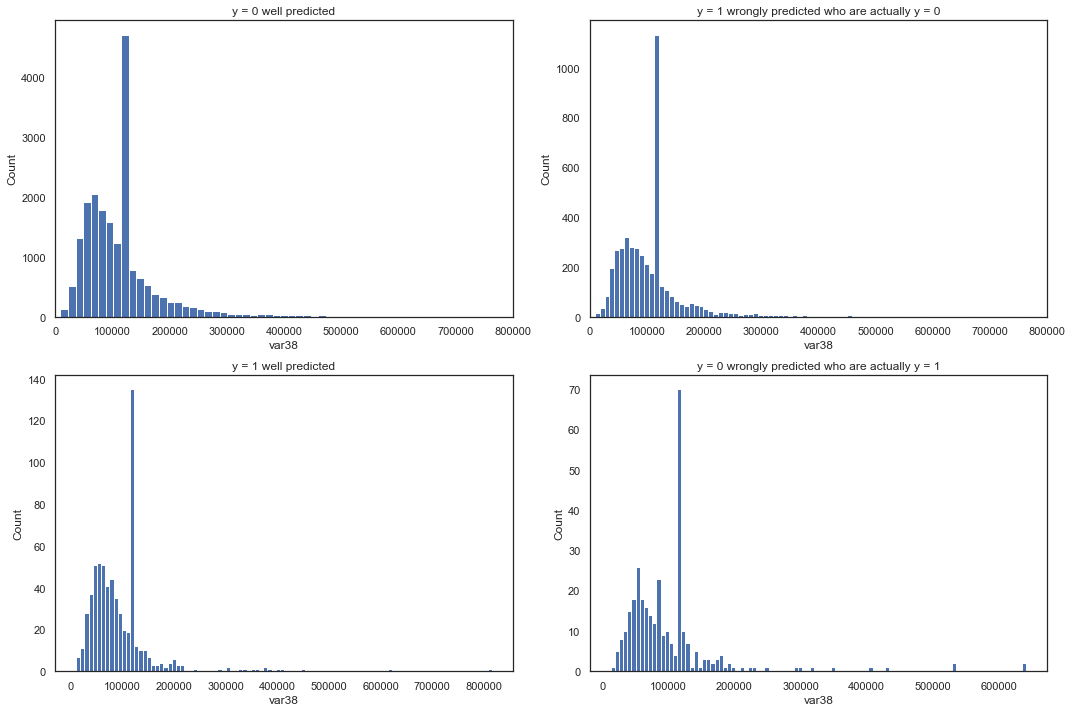

In [185]:
# Create Figure and Subplots
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax3 = plt.subplot2grid((2,2), (1,0)) 
ax4 = plt.subplot2grid((2,2), (1,1)) 


# Plot
ax1.hist(good0["var38"], bins = 1000)
ax2.hist(errors1["var38"], bins = 1000)
ax3.hist(good1["var38"], bins = 100)
ax4.hist(errors0["var38"], bins = 100)


# Title, X and Y labels, X and Y Lim
ax1.set_title('y = 0 well predicted'); ax2.set_title('y = 1 wrongly predicted who are actually y = 0') ; ax3.set_title('y = 1 well predicted'); ax4.set_title('y = 0 wrongly predicted who are actually y = 1')

ax1.set_xlabel('var38');  ax2.set_xlabel('var38'); ax3.set_xlabel('var38');  ax4.set_xlabel('var38')  # x label
ax1.set_ylabel('Count');  ax2.set_ylabel('Count'); ax3.set_ylabel('Count');  ax4.set_ylabel('Count')  # y label

ax1.set_xlim(0, 800000) ;  ax2.set_xlim(0, 800000)   # x axis limits


# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

# SUBMIT KAGGLE

In [ ]:
tokeep = train[['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38','TARGET']]

X = tokeep.iloc[:,:-1]
y = tokeep.TARGET

sampler = SMOTE(random_state=12, ratio = 1.0)
X_rs, y_rs = sampler.fit_sample(X, y)

test_id = test.ID
test = test.drop(["ID"],axis=1)

test = test[['saldo_var30','var15','saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'var38']]

LGBM = LGBMClassifier(max_depth = 3, n_estimators = 750, learning_rate = 0.01)
LGBM.fit(X, y)

In [ ]:
probs = LGBM.predict_proba(test)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("submission.csv", index=False)

Kaggle Score : 
- Private Score -> 0.81089
- Public Score -> 0.82892